In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import norm
from statsmodels.tsa.arima.model import ARIMA

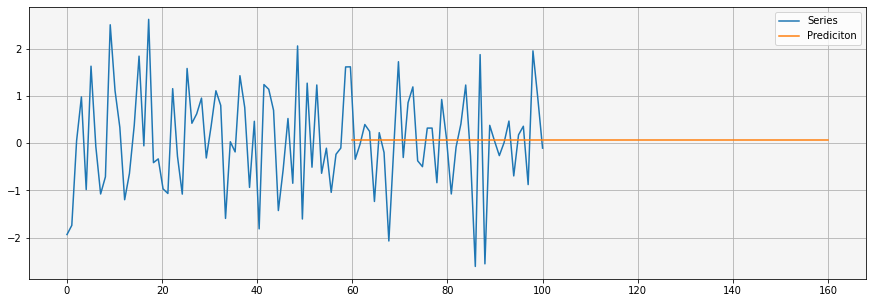

In [2]:
"""White Noise"""

x = np.linspace(0, 100, 100)
ts = norm.rvs(loc=0, scale=1, size=100)
start_forecast = 60
forecast_length = 100


y = np.linspace(start_forecast, start_forecast + forecast_length, forecast_length + 1)

model = ARIMA(ts,order=(0, 0, 0))
res = model.fit()
pred = res.predict(int(y[0]), int(y[-1]))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x, ts, label="Series")
ax.plot(y, pred, label="Prediciton")

ax.legend()
ax.set_facecolor("whitesmoke")
ax.grid()

plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2836.646
Date:                Sun, 25 Oct 2020   AIC                           5683.291
Time:                        17:17:04   BIC                           5711.293
Sample:                             0   HQIC                          5693.573
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5798      0.045     12.746      0.000       0.491       0.669
ar.L2         -0.9594      0.044    -21.706      0.000      -1.046      -0.873
ma.L1         -0.5902      0.042    -13.922      0.0

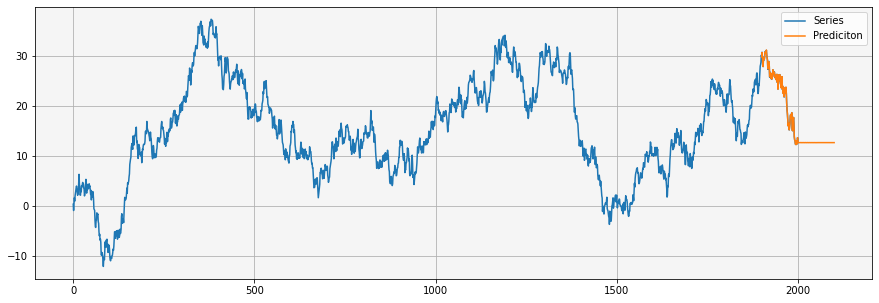

In [50]:
"""MA(1)"""

mu = 1
theta = .999
length = 2000

start_forecast = 1900
forecast_length = 200

def create_ma1(mu, theta, length, seed=None):
    epsilon = norm(loc=0, scale=1).rvs(length)
    
    for i, e in enumerate(epsilon[1:]):
        epsilon[i + 1] = epsilon[i + 1] + theta * epsilon[i]

    epsilon += mu

    return epsilon

x = np.linspace(0, length, length)
ts = create_ma1(mu, theta, length)

y = np.linspace(start_forecast, start_forecast + forecast_length, forecast_length + 1)


model = ARIMA(ts, order=(2, 1, 2))
res = model.fit()
print(res.summary(), res.conf_int(alpha=0.05), sep="\n\n")
pred = res.predict(int(y[0]), int(y[-1]))


fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x, ts, label="Series")
ax.plot(y, pred, label="Prediciton")

ax.legend()
ax.set_facecolor("whitesmoke")
ax.grid()

plt.show()

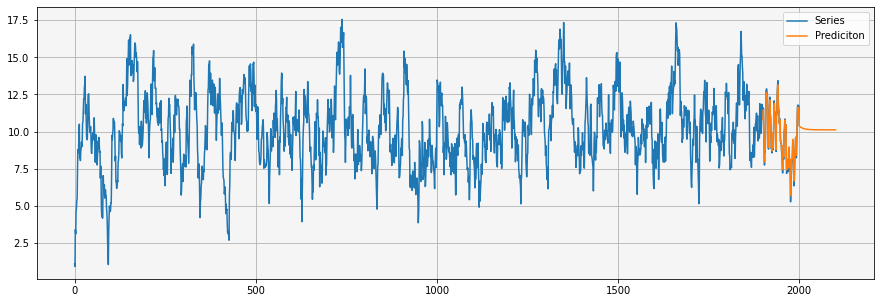

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2864.313
Date:                Sun, 25 Oct 2020   AIC                           5734.625
Time:                        17:17:31   BIC                           5751.428
Sample:                             0   HQIC                          5740.795
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1179      0.247     40.982      0.000       9.634      10.602
ar.L1          0.9127      0.008    116.544      0.000       0.897       0.928
sigma2         1.0259      0.032     32.017      0.0

array([[ 5.25937983, 14.97645794],
       [-0.11126605,  3.85903848],
       [-0.2694667 ,  3.70083783],
       ...,
       [ 8.87887549, 12.84918002],
       [ 9.62759936, 13.59790389],
       [ 9.31541858, 13.28572311]])

In [51]:
"""AR(1)"""

c = 1
theta = .9
length = 2000

start_forecast = 1900
forecast_length = 200

def create_ar1(mu, theta, length, seed=None):
    epsilon = norm(loc=0, scale=1).rvs(length)
    epsilon[0] += c
    
    for i, e in enumerate(epsilon[1:]):
        epsilon[i + 1] = c + epsilon[i + 1] + theta * epsilon[i]

    return epsilon

x = np.linspace(0, length, length)
ts = create_ar1(mu, theta, length)

y = np.linspace(start_forecast, start_forecast + forecast_length, forecast_length + 1)


model = ARIMA(ts, order=(1, 0, 0))
res = model.fit()
pred = res.predict(int(y[0]), int(y[-1]))
forecast = res.forecast(steps=100, alpha=0.05)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x, ts, label="Series")
ax.plot(y, pred, label="Prediciton")
#ax.plot(y, forecast, label="Forecast")

ax.legend()
ax.set_facecolor("whitesmoke")
ax.grid()

plt.show()

print(res.summary(), res.conf_int(alpha=0.05), sep="\n\n")

res.get_prediction().conf_int()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


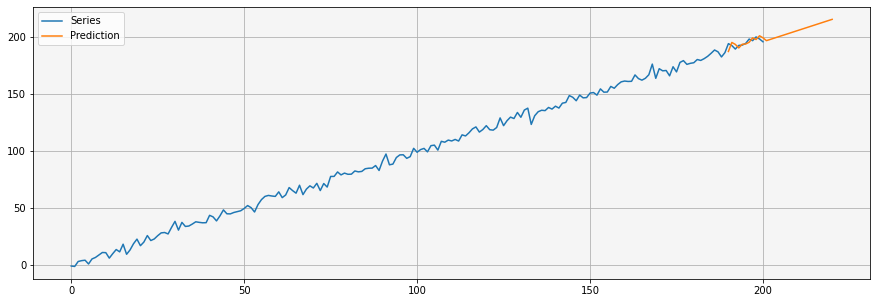

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  201
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -560.574
Date:                Sun, 25 Oct 2020   AIC                           1125.148
Time:                        17:25:39   BIC                           1131.734
Sample:                             0   HQIC                          1127.814
                                - 201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9997      4.126     -0.242      0.809      -9.087       7.088
sigma2        15.9542     65.766      0.243      0.808    -112.945     144.853
Ljung-Box (L1) (Q):                  40.09   Jarque-

In [94]:
# """I(1)"""

"""MA(1)"""

length = 200

start_forecast = -10 # index starts at end of series
forecast_length = 30


x = np.linspace(0, length, length + 1)
ts = norm.rvs(loc=0, scale=3, size=len(x)) + x

y = np.linspace(length + start_forecast, length + start_forecast + forecast_length, forecast_length + 1)


model = ARIMA(ts, order=(0, 2, 1))
fit = model.fit()

preds = fit.predict(int(y[0]), int(y[-1]), typ='levels')


fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(x, ts, label="Series")
ax.plot(y, preds, label="Prediction")

ax.legend()
ax.set_facecolor("whitesmoke")
ax.grid()

plt.show()

print(fit.summary())